
# 인공지능 데브코스 6기 - A 김정연

# Mission 1. Netfilx and Code

호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

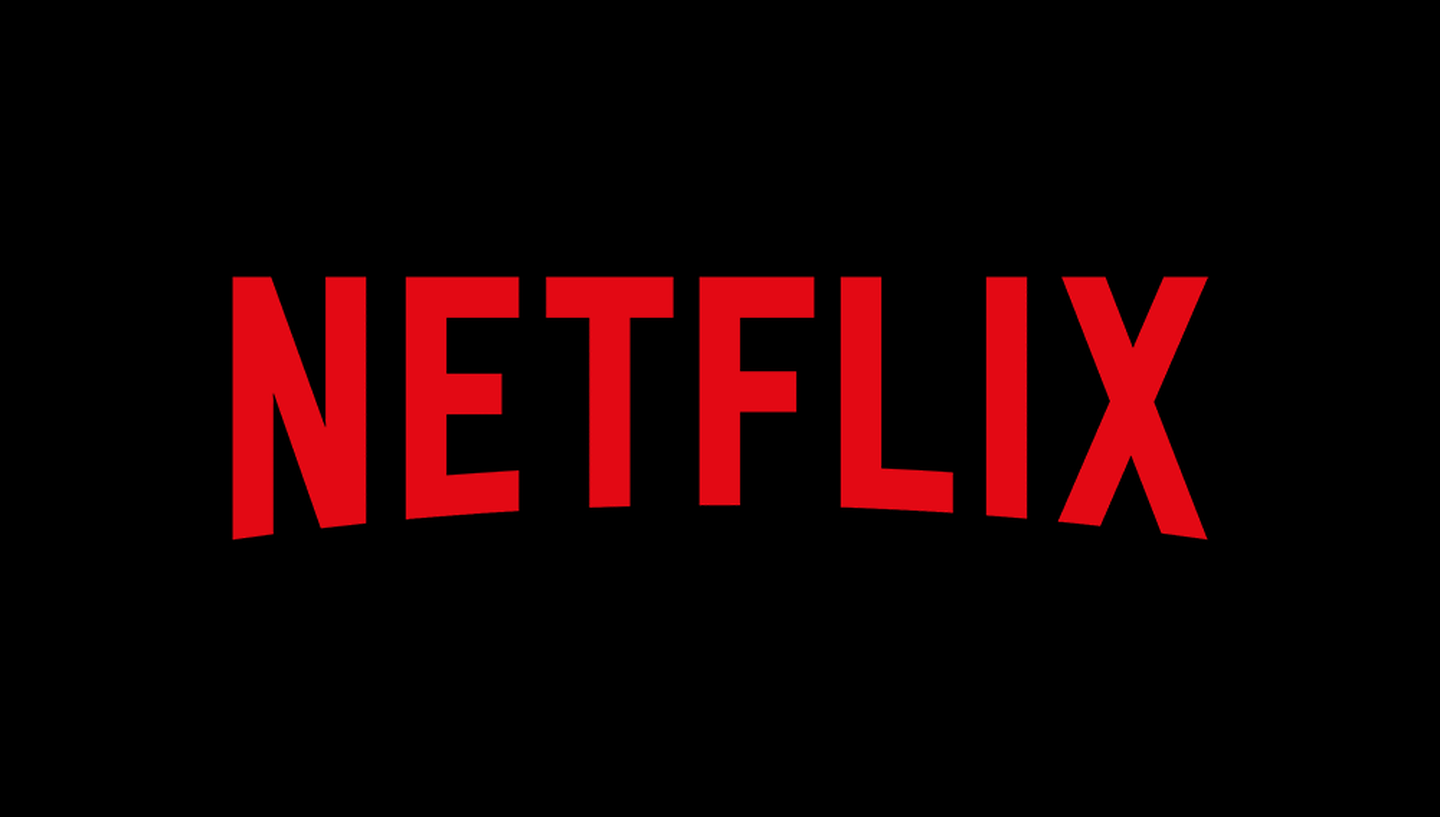

## Core Mission

[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

- **한국 작품**은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [2]:
import pandas as pd
netflix_df = pd.read_csv('../3w/archive/netflix_titles.csv')
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- 예외되는 데이터 검토

In [3]:
netflix_df[netflix_df['country']=='US, South Korea']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


- A. 한국작품 개수

In [4]:
netflix_df['country'].value_counts()['South Korea']

199

---
### Bonus Part

- $Q$. 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

country column을 기준으로 한다.

단일 국가인 경우를 기준으로 결과를 구해보자

- $A$. United States    2818

In [5]:
netflix_df['country'].value_counts()[:1]


country
United States    2818
Name: count, dtype: int64

---
# Mission 2. 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving** **Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

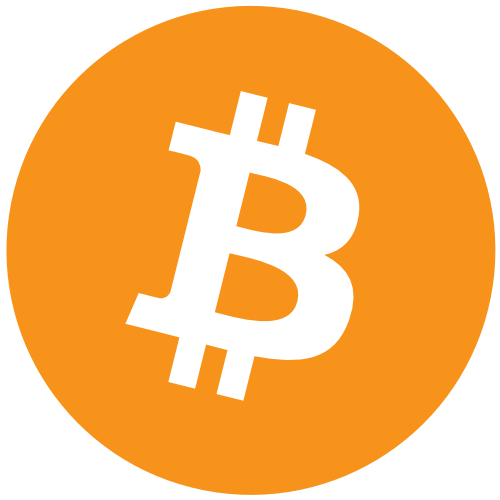

## Core Mission

[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

---

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.



##### 이동평균 함수 

`.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')`

- `window` : 계`산할 창(window)의 크기 입니다. 열 기준으로 계산할 경우 행의 수입니다.
min_periods : 계산할 최소 크기(기간) 입니다. window 안의 값의 수가 min_periods의 값보다 작을경우 NaN을 출력합니다. 
기본적으로 window 크기와 동일합니다.
- `center` : {True / False} 레이블을 window의 중간에 둘지 여부입니다. 기본값은 False로 레이블이 창 우측에 위치합니다.
- `win_type` : {'triang' / 'gaussian' / ...} 가중치를 넣어 계산할 경우 계산 방식 입니다. 때에따라 연산 메서드에 추가 인수를 지정해야할수도 있습니다.
- `on`: 시계열 인덱스나, 시계열과 유사한 열이 있을 경우 이 열을 기준으로 rolling을 수행할 수 있습니다.
- `axis` : 계산의 기준이 될 축입니다.
- `closed` : {'left' / 'right' / 'both' / 'neither'} window가 닫히는 방향입니다. 자세한건 아래 예시 참고바랍니다
- `method` :{'single' / 'table'} numba 를 이용하여 테이블 계산을 진행하여 속도를 높힐지 여부입니다. 현재 'single'만 사용가능합니다.

In [39]:
bit_df = pd.read_csv('../3w/archive/BitCoin.csv')

# 기간 자르기
bit_duration = bit_df[(bit_df['Date'] >= '2016-06-01') & (bit_df['Date'] <= '2017-06-30')]
bit_duration.info()


<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 16 to 625
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idx         377 non-null    int64  
 1   Date        377 non-null    object 
 2   Open        377 non-null    float64
 3   High        377 non-null    float64
 4   Low         377 non-null    float64
 5   Close       377 non-null    float64
 6   Volume      377 non-null    float64
 7   Market Cap  377 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 26.5+ KB


In [40]:
# 문자열 날짜 -> datetime 자료형 변환
# bit_duration['Date'] = pd.to_datetime(bit_duration['Date'])
bit_duration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 16 to 625
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idx         377 non-null    int64  
 1   Date        377 non-null    object 
 2   Open        377 non-null    float64
 3   High        377 non-null    float64
 4   Low         377 non-null    float64
 5   Close       377 non-null    float64
 6   Volume      377 non-null    float64
 7   Market Cap  377 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 26.5+ KB


##### 날짜 정렬

`df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)`

- `by` : 정렬 기준이될 레이블입니다. 
- `axis` : {0 : index / 1: columns} 정렬할 레이블입니다. 0이면 행, 1이면 열을 기준으로 정렬합니다.
- `inplace` : 원본을 대체할지 여부입니다. True일 경우 원본을 대체하게 됩니다.
- `kind` : 알고리즘 모드 입니다. 모드는 총 4종으로 quicksort, mergesort, heapsort, stable이 있는데, 
속도와 효율성의 차이를 갖습니다. 기본적으로 quicksort이며, 자세한건 numpy doc에서 확인 가능합니다.
- `na_position` : {first / last} Na값의 위치입니다. 기본값은 last로 정렬시 맨 뒤에 위치합니다.
- `ignore_index` : 인덱스의 무시 여부입니다. True일 경우 인덱스의 순서와 상관없이 0,1,2,... 로 정해집니다.
- `key` : 이 인수를 통해 정렬방식으로 함수를 사용할 수 있습니다. lamba의 사용이 가능합니다.

In [41]:
bit_duration = bit_duration.sort_values(by='Date')
for i in range(len(bit_duration)//10):
    print(bit_duration['Date'].iloc[10*i:10*(i+1)])

625    2016-06-01
594    2016-06-02
565    2016-06-03
534    2016-06-04
504    2016-06-05
473    2016-06-06
443    2016-06-07
412    2016-06-08
381    2016-06-09
351    2016-06-10
Name: Date, dtype: object
320    2016-06-11
290    2016-06-12
466    2016-06-13
465    2016-06-14
464    2016-06-15
463    2016-06-16
462    2016-06-17
461    2016-06-18
460    2016-06-19
459    2016-06-20
Name: Date, dtype: object
458    2016-06-21
457    2016-06-22
456    2016-06-23
455    2016-06-24
454    2016-06-25
453    2016-06-26
452    2016-06-27
451    2016-06-28
450    2016-06-29
449    2016-06-30
Name: Date, dtype: object
624    2016-07-01
593    2016-07-02
564    2016-07-03
533    2016-07-04
503    2016-07-05
472    2016-07-06
442    2016-07-07
411    2016-07-08
380    2016-07-09
350    2016-07-10
Name: Date, dtype: object
319    2016-07-11
289    2016-07-12
436    2016-07-13
435    2016-07-14
434    2016-07-15
433    2016-07-16
432    2016-07-17
431    2016-07-18
430    2016-07-19
429    2016-07

In [42]:
bit_duration['Date'] = pd.to_datetime(bit_duration['Date'])

#####  5-MA(Moving Average) 비트코인

In [27]:
bit_duration['5MA'] = bit_duration['Open'].rolling(window=5, min_periods=1).mean()
bit_duration.head()

,Idx,Date,Open,High,Low,Close,Volume,Market Cap,5MA
625,625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,431.860000
594,594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,409.225000
565,565,2016-06-03,400.52,411.91,395.78,407.71,91212500.0,6121400000,406.323333
534,534,2016-06-04,424.28,424.53,422.73,423.41,59091000.0,6533260000,410.812500
504,504,2016-06-05,447.94,461.38,447.07,459.60,72796800.0,6947800000,418.238000


#####  5-MA(Moving Average) 비트코인 그래프

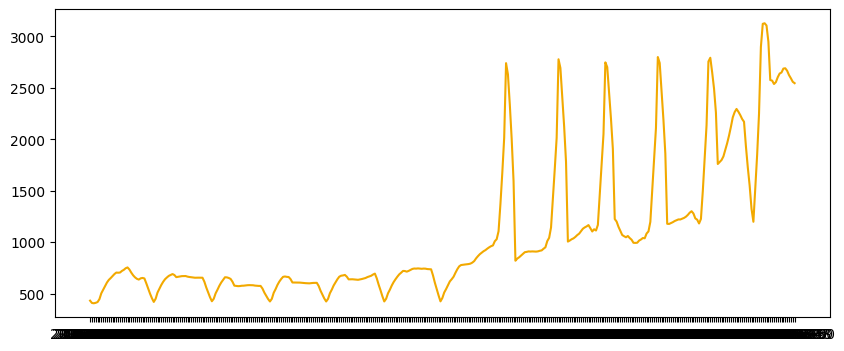

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
fig = plt.plot(bit_duration['Date'],bit_duration['5MA'],c='#f2a900')
fig 

---
## Extra Mission

위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [11]:
eHD = pd.read_csv('../3w/archive/ETH_day.csv')

eHD_duration = eHD[(eHD['Date']>='2016-06-01')&(eHD['Date']<='2017-06-30')]
eHD_duration['Date'] = pd.to_datetime(eHD_duration['Date'])
eHD_duration = eHD_duration.sort_values(by='Date')

eHD_duration['5MA'] = eHD_duration['Open'].rolling(window=5, min_periods=1).mean()

eHD_duration.head()

/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_37679/96336117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eHD_duration['Date'] = pd.to_datetime(eHD_duration['Date'])


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,5MA
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81,14.1800
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38,14.0650
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19,14.0100
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39,14.0125
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67,13.9820


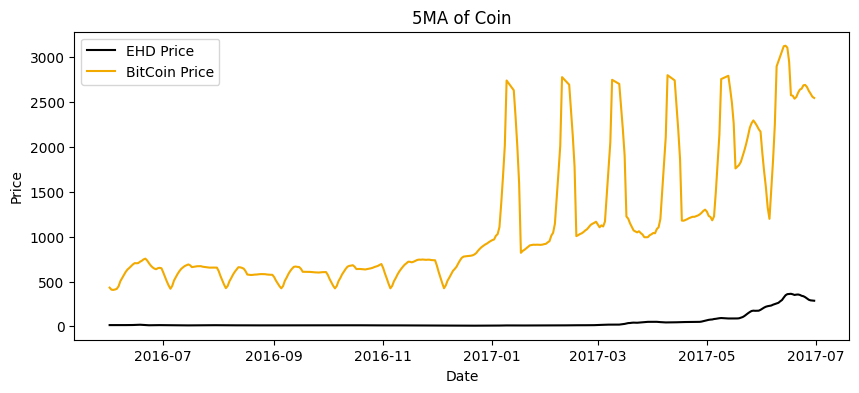

In [12]:
plt.figure(figsize=(10,4))

plt.plot(eHD_duration['Date'], eHD_duration['5MA'],c="#000000",label= 'EHD Price')
plt.plot(bit_duration['Date'],bit_duration['5MA'],c='#f2a900', label= 'BitCoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('5MA of Coin')
plt.legend()
plt.show()